(path-analysis-notebook)=
# Visualizzare il modelli di equazioni strutturali 

In [6]:
source("_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semPlot")
    library("lavaanPlot")
    library("DiagrammeRsvg")
    library("rsvg")
})

set.seed(42)
options(repr.plot.width=6, repr.plot.height=6)

Le visualizzazioni sono strumenti essenziali per comunicare relazioni complesse tra variabili in modo accessibile e succinto. Poiché i modelli di equazioni strutturali (SEM) sono, di natura, multivariati, esprimendo spesso una complessa rete di relazioni direzionali e non direzionali tra variabili manifeste e latenti, i ricercatori utilizzano strumenti grafici per facilitare la specificazione e l'espressione del modello, e per presentare i propri risultati.

La *path analysis* è un metodo per decomporre la correlazione (o la covarianza) in componenti differenti al fine di descrivere le relazioni tra variabili. Lo sviluppo di diagrammi di percorso per descrivere i modelli di equazioni strutturali è attribuito a Wright (1920). La *path analysis* comprende due parti principali: la rappresentazione grafica delle interrelazioni tra le variabili e la scomposizione delle correlazioni (o covarianze) nei termini dei parametri del modello.

## Path diagram

Il path diagram fornisce una rappresentazione grafica delle relazioni
esistenti tra le variabili oggetto di interesse. In tale diagramma, le
variabili non osservate o latenti sono racchiuse in un cerchio o
ellisse; le variabili osservate sono racchiuse in un quadrato o
rettangolo. Due classi di variabili vengono rappresentate in un path
diagram: quelle che non ricevono effetti causali da altre variabili e
quelle che li ricevono. Una variabile *esogena* (cioè esterna) svolge
sempre e soltanto funzione di variabile indipendente, ovvero di
variabile che causa un effetto. Una variabile *endogena* (cioè interna)
può essere effetto di alcune variabili e contemporaneamente causa per
altre, oppure può svolgere solo il ruolo di variabile dipendente. Le
fonti causali delle variabili endogene sono interne al path diagram; le
fonti causali delle variabili esogene sono esterne al path diagram. La
distinzione tra variabili esogene e endogene ha delle ovvie assonanze
con la distinzione tra variabili indipendenti e dipendenti propria dei
modelli lineari.

Le frecce che connettono le variabili nel diagramma denotano nessi
causali o mere associazioni. Una freccia orientata rappresenta un nesso
causale tra le variabili implicate: la variabile che riceve la freccia
dipende dalla variabile da cui parte la freccia. Una freccia curva a due
direzioni indica, invece, un'associazione non causale tra due variabili.
Il fatto che due variabili non siano collegate nel diagramma equivale ad
assumere che tali variabili siano incorrelate. Un esempio è fornito
nella figura successiva la quale rende esplicite le relazioni tra
tre variabili latenti e nove variabili manifeste.

```{figure} images/path_01.png
---
height: 450px
name: path_01-fig
---
**Diagramma di percorso per un modello a tre fattori comuni.
```

## Path analysis e regressione multipla

Vi è una stretta relazione tra path analysis e regressione multipla,
tanto che la regressione può essere considerata un caso particolare di
path analysis. Per semplicità, si supponga che le variabili siano state
standardizzate, anche se la stessa analisi può essere condotta per
variabili grezze. Il path diagram mostra la relazione tra tutte le
variabili, comprendendo anche i fattori di disturbo, e fornisce dunque
la rappresentazione grafica di un sistema di equazioni simultanee. Nel
caso di due regressori, il modello di regressione multipla può essere
rappresentato tramite il path diagram riportato nella
figura seguente.

```{figure} images/path_02.png
---
height: 300px
name: path_02-fig
---
**Diagramma di percorso per il modello di regressione multipla.
```

I coefficienti di percorso associati alle frecce orientate esprimono la
portata del nesso causale e corrispondono ai pesi beta (ovvero ai
coefficienti parziali di regressione standardizzati). Le frecce non
orientate esprimono la portata della pura associazione tra variabili e
dunque corrispondono alle correlazioni.

Nel caso di due variabili esogene $x_1$ e $x_2$, il modello di
regressione diventa 

$$
y = b_{1} x_1 + b_{2} x_2 + 1 \cdot e,
$$ 

dove $y$ è la variabile endogena ed $e$ è il fattore di disturbo. Tale modello di
regressione può essere rappresentato graficamente come indicato nella
figura precedente.

Nella figura, le frecce dritte indicano un'influenza causale dalla
variabile da cui parte la freccia a quella a cui la freccia arriva. A
tali frecce dritte sono associati i coefficienti di percorso $b_1$ e
$b_2$ (ovvero i pesi beta). Il coefficiente 1 rappresenta l'effetto del
fattore di disturbo $e$ sulla variabile endogena $y$, implicito nelle
equazioni e reso esplicito nella figura.

Si noti che si hanno tante equazioni quante sono le variabili endogene.
Nel caso presente, c'è un'unica equazione in quanto vi è una sola
variabile endogena (ovvero la $y$, le cui cause sono interne al path
diagram). All'interno di ciascuna equazione, inoltre, ci saranno tanti
termini quante sono le frecce dritte che puntano verso la variabile
endogena. Nell'esempio, ci sono tre termini, uno per ciascun freccia
dritta.

## Effetti diretti e indiretti

La path analysis fornisce un metodo per distinguere tra i diversi tipi
di effetti che influenzano le variabili: l'effetto diretto, l'effetto
indiretto e l'effetto totale. Gli effetti diretti sono quelli non
mediati da altre variabili. Gli effetti indiretti operano attraverso
l'intervento di almeno una variabile. L'effetto totale è la somma di
tutti gli effetti diretti e indiretti.

Nella figura seguente, la variable $y_1$ ha un effetto
diretto sulla $y_2$. La variabile $y_1$ ha un effetto indiretto sulla
$y_3$ in quanto non c'è una freccia causale che colleghi direttamente la
variabile $y_1$ alla $y_3$. La variabile $y_1$ è una variabile esogena e
le varibili $y_2$ e $y_3$ sono variabili endogene.

```{figure} images/path_03.png
---
height: 80px
name: path_03-fig
---
**Diagramma di percorso per un modello a catena.**
```

Nella figura precedente, la variabile $x_1$ ha un effetto
diretto sulla $y$, ma anche un effetto indiretto sulla $y$ derivante
dalla correlazione tra $x_1$ e $x_2$. In un path diagram, l'effetto
diretto è rappresentato da una freccia dritta (es., $b_{1}$). L'effetto
indiretto tra due variabili è rappresentato da un percorso composto che
include una o più frecce dritte e non più di una linea curva -- per es.,
$s_{12} b_{2}$.

## Le regole di Wright

Lo scopo della path analysis è quello di decomporre la correlazione (o
la covarianza) nei termini della somma di tutti i percorsi (diretti e
indiretti) che legano le due variabili tramite i coefficienti detti
*path coefficients*. Usando il path diagram, Sewall Wright (1921, 1934)
enunciò le regole che, attraverso le cosiddette *tracing rules*, legano
le correlazioni (o covarianze) delle variabili ai parametri del modello.
Le tracing rules possono essere espresse nei termini seguenti:

-   è possibile procedere prima all'indietro lungo una freccia e poi in
    avanti, seguendo la direzione di una freccia, ma non si può andare
    prima avanti e poi tornare indietro;
-   un percorso composto non deve transitare due volte per la stessa
    variabile (non devono esserci loop);
-   un percorso non può comprendere più di una linea curva.

Si chiama "percorso" il tracciato che unisce due variabili; è costituito
da sequenze di frecce direzionali e di curve non direzionali. A ciascun
percorso legittimo (ovvero, che soddisfa le regole di Wright) viene
assegnato un valore numerico pari al prodotto dei coefficienti
incontrati sul percorso medesimo. I coefficienti di percorso possono
essere o coefficienti parziali di regressione standardizzati, se il
legame ha una direzione, oppure coefficienti di correlazione, se il
legame è bidirezionale.

### Scomposizione delle correlazioni (covarianze)

Il principio di base è stato espresso da Sewall Wright (1934) nel modo
seguente: "Any correlation between variables in a network of sequential relations
can be analyzed into contributions from all the paths (direct or
through common factors) by which the two variables are connected, such
that the value of each contribution is the product of the coefficients
pertaining to the elementary paths. If residual correlations are
present (represented by bidirectional arrows) one (but never more than
one) of the coefficients thus multiplied together to give the
contribution of the connecting path, may be a correlation coefficient.
The others are all path coefficients."

Possiamo così enunciare la regola di scomposizione della correlazione. La correlazione fra due variabili può essere decomposta in tanti addendi
quanto sono i percorsi che le collegano; ogni addendo è dato dal
prodotto dei coefficienti incontrati sul percorso.

Si consideri il diagramma rappresesentato nella Figura \@ref(fig:path02). La variabile endogena è la $y$. Le variabili esogene, correlate tra loro, sono $x_1$ e $x_2$.

Il diagramma di percorso corrisponde alla seguente equazione:

$$
y = 0.50 x_1 + 0.40 x_2 + e,
$$ 

dove le variabili $x_1$ e $x_2$ sono incorrelate con $e$.

La correlazione tra $y$ e $x_1$ è uguale alla somma dell'effetto diretto
che $x_1$ esercita sulla $y$ e dell'effetto indiretto che $x_1$ esercita
sulla $y$ tramite la correlazione con $x_2$. In base alle regole di
Wright, $x_1$ e $y$ risultano collegate da due percorsi legittimi: il
percorso costituito dalla freccia dritta $x_1 \rightarrow 
 y$; il percorso composto dalla freccia dritta $x_2 \rightarrow 
 y$ e dalla curva non direzionale $x_1 \leftrightarrow x_2$. Il valore
numerico del primo percorso è $0.50$. Il valore numerico del secondo
percorso è $0.50\times 0.40$. La correlazione tra le variabili $x_1$ e
$y$ è dunque uguale alla somma dei valori numerici dei due percorsi
legittimi che legano $x_1$ alla $y$: 

$$
\begin{equation}
\begin{aligned}
  r_{x_1,y} &= \beta_{y,x_1} + r_{x_1,x_2} \beta_{y,x_2}\notag\\
  &=   0.50 + 0.50 \times 0.40 = 0.70.\notag
\end{aligned}
\end{equation}
$$

La correlazione tra $x_2$ e $y$ è invece uguale a: 

$$
\begin{equation}
\begin{aligned}
  r_{yx_2} &=\beta_{yx_2} + r_{x_1x_2} \beta_{yx_1}\notag\\
  &= 0.40 + 0.50 \times 0.50 = 0.65.\notag
\end{aligned}
\end{equation}
$$

### Scomposizione della varianza

La varianza di una variabile endogena si decompone in una quota di
varianza spiegata dalle variabili agenti causalmente su di essa e in una
quota di varianza non spiegata: la varianza spiegata è data dalla somma di tanti addendi quanti sono i
percorsi che consentono di collegare la variabile a se stessa
rispettando le tracing rules di Wright.

Facendo riferimento al diagramma di percorso relativo al modello di regressione multipla, si possono individuare quattro percorsi legittimi che collegano $y$ a se stessa:

1.  $0.50 \times 1.00 \times 0.50$,
2.  $0.40 \times 1.00 \times 0.40$,
3.  $0.50 \times 0.50 \times 0.40$,
4.  $0.40 \times 0.50 \times 0.50$.

La varianza della variabile endogena $y$ che viene spiegata dalle
variabili esogene $x_1$ e $x_2$ è dunque uguale a

$$
0.25 + 0.16  + 0.10 + 0.10= 0.61.
$$ 

Inoltre, dato che le variabili
rappresentate nel diagramma sono standardizzate, la varianza complessiva
della $y$ è uguale a 1.00. La varianza della $y$ non spiegata dalle
variabili $x_1$ e $x_2$ è quindi uguale a 

$$
1-0.61 = 0.39.
$$

## Come calcolare i coefficienti di percorso?

Data una matrice di correlazione, i coefficienti di percorso possono
essere calcolati risolvendo un sistema di equazioni simultanee. Si
supponga che, per le tre variabili della figura precedente, vi sia la
seguente matrice di correlazione:

|         | $y$    | $x_1$  | $x_2$   |
|  ------ | ------ | ------ | ------- |
|    $y$  |  1.00  |        |         |
|   $x_1$ |  0.70  | 1.00   |         |
|  $x_2$  | 0.65   | 0.50   | 1.00    |

Esprimendo le tre correlazioni nei termini dei coefficienti del path
diagram otteniamo: 

$$
\begin{equation} 
\begin{cases} 
r_{x_1x_2} &= 0.50\\ 
r_{yx_2} &= \beta_{yx_2} + 0.50 \beta_{yx_1} = 0.65\\ 
r_{x_1y} &= \beta_{yx_1} +   0.50 \beta_{yx_2} = 0.70
\end{cases}
\end{equation} 
$$

Risolvendo il sistema di equazioni simultanee, si ottengono i valori dei coefficienti di percorso: 

$$
\begin{equation}
\begin{aligned}
\beta_{yx_1} &= 0.50\notag\\ 
\beta_{yx_2} &= 0.40\notag
\end{aligned}
\end{equation}
$$

## Path analysis con `lavaan` 

Usiamo `lavaan` per svolgere l'analisi statistica descritta nell'esempio precedente.

**Esercizio.** La matrice di correlazioni di partenza è:

In [2]:
lower <- '
  1
  .70 1
  .65 .50 1 
'

Convertiamo tali dati in una matrice simmetrica.

In [3]:
dat.cov <- getCov(lower, names=c("y","x1", "x2"))
dat.cov

,y,x1,x2
y,1.00,0.7,0.65
x1,0.70,1.0,0.50
x2,0.65,0.5,1.00


Specifichiamo il modello con la sintassi di `lavaan`.

In [4]:
mr_model <- 'y ~ x1 + x2'

Adatto il modello ai dati.

In [5]:
fit <- sem(mr_model, sample.cov = dat.cov, sample.nobs = 100)

Esaminiamo i risultati.

In [6]:
out = summary(fit, standardized=TRUE)
print(out)

lavaan 0.6.15 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         3

  Number of observations                           100

Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  y ~                                                                   
    x1                0.500    0.072    6.934    0.000    0.500    0.500
    x2                0.400    0.072    5.547    0.000    0.400    0.400

Variances:
                   Estimate  Std.Err

Con la funzione `sem()` del pacchetto `lavaan` abbiamo dunque replicato
i risultati ottenuti in precedenza. Il valore $0.386$ rappresenta la
quota di varianza della $y$ non spiegata dalle variabili esogene.

Ripetiamo ora la stessa procedura simulando 100 osservazioni su tre variabili, in maniera tale da avere a disposizione i dati grezzi. Imponendo un effetto
causale diretto delle variabili $x_1$ e $x_2$ sulla $y$ e una
correlazione $> 0$ tra le variabili $x_1$ e $x_2$, otteniamo i dati seguenti.

In [ ]:
set.seed(3)
n <- 100
x1 <- rnorm(n, 100, 9)
x2 <- x1 + rnorm(n, 0, 10)
cor(x1, x2)
y <- 10 + 3 * x1 + 1.5 * x2 + rnorm(n, 0, 15)
dd <- data.frame(y, x1, x2)
print(cor(dd), 3)

Per fare un esempio, immaginiamo che queste correlazioni siano state ricavate da qualche fonte e dunque le leggiamo nella memoria di lavoro di $\mathsf{R}$ nel modo seguente.

In [ ]:
lower <- "
 1
 .831 1
 .786 .535 1 
"
dat.cov <- getCov(lower, names = c("y", "x1", "x2"))
dat.cov

Data una matrice di correlazioni e data la specificazione delle
relazioni tra le variabili, la funzione `sem()` contenuta nel pacchetto
`lavaan` consente di stimare i coefficienti di percorso. 

In [ ]:
mr.model <- 'y ~ x1 + x2'
fit <- sem(mr.model, sample.cov = dat.cov, sample.nobs = 100)

Esaminiamo i risultati con la funzione `summary()`.

In [ ]:
summary(fit, standardized = TRUE) |>
    print()

Ora calcoliamo i coefficienti del modello di regressione multipla usando i dati grezzi (standardizzati). Si noti che i risultati ottenuti da `lavaan` sono identici a quelli prodotti dal modello di regressione multipla -- nel caso presente, infatti, il modello statistico esaminato da `sem()` non era altro che il modello di regressione multipla.

In [ ]:
summary(lm(scale(y) ~ scale(x1) + scale(x2))) |>
    print()

La quota di varianza non spiegata della variabile endogena è:

In [ ]:
1 - .145

## Oltre la regressione multipla

In generale, lo psicologo ha a che fare con diagrammi di percorso nei
quali sono presenti variabili non osservabili (latenti) e quindi
l'approccio della regressione multipla non può essere applicato. È
necessario invece descrivere il diagramma di percorso mediante un
insieme di equazioni strutturali, definendo un numero di equazioni
almeno altrettanto grande quanto il numero delle incognite. Tale
soluzione viene solitamente fornita da un software. Consideriamo di
seguito alcuni esempi in cui vengono applicate le regole di Wright per
diagrammi di percorso che non possono essere descritti nei termini di un
modello di regressione multipla. Un esempio di path diagram che non si
riduce al modello di regressione multipla è quello del modello con tre fattori comuni esaminato in precedenza.

La path analysis è anche usata in quel campo della psicologia
interessato alla misurazione dei costrutti psicologici quali i tratti
della personalità, le capacità cognitive e i disturbi psicopatologici.
Questa è la ragione per cui la discutiamo qui.

**Esercizio.** In questo primo esempio, l'analisi dei percorsi verrà utilizzata per testare un
modello a priori che si basa sul quadro teorico della *Self Determination Theory* (SDT; Deci & Ryan, 2000), una delle principali teorie della motivazione umana. Questo modello concettuale applicherà la SDT per esaminare i principali determinanti psicologici e comportamentali dei sintomi bulimici in un campione di giovani donne adulte. Più specificamente, esamineremo come l'appagamento (soddisfazione) e l'esaurimento (frustrazione) delle risorse psicologiche essenziali, o bisogni psicologici (ad esempio, per l'autonomia, la competenza e la relazionalità), possono prevedere in modo differenziale i sintomi bulimici nelle donne attraverso due mediatori chiave, l'approvazione degli ideali culturali sulla magrezza e inflessibilità delle opinioni sul proprio corpo. Secondo la SDT, i bisogni psicologici influenzano la capacità di un individuo di autoregolarsi e far fronte alle richieste della vita quotidiana e possono rendere gli individui vulnerabili al malessere psicologico se i bisogni psicologici vengono frustrati
(Vansteenkiste & Ryan, 2013). La frustrazione dei bisogni può essere
psicologicamente più depauperante della mancanza di soddisfazione dei bisogni. 

Gli individui i cui bisogni vengono frustrati possono impegnarsi in attività malsane e comportamenti compensatori al fine di riconquistare una soddisfazione dei bisogni a breve termine. La frustrazione dei bisogni rende gli individui più vulnerabili agli ideali culturali, in quanto le risorse personali per rifiutare questi ideali sono esaurite (Pelletier & Dion, 2007).

Il modello che verrà testato propone che le donne i cui bisogni psicologici sono frustrati avalleranno ideali sociali più problematici sulla magrezza rispetto alle donne i cui bisogni psicologici sono soddisfatti. La frustrazione dei bisogni sarà anche predittiva dell'inflessibilità degli schemi corporei, poiché è stato dimostrato che la frustrazione dei bisogni porta a disturbi dell'immagine corporea e a comportamenti alimentari patologici (Boone, Vansteenkiste, Soenens, Van der Kaap-Deeder e Verstuyf, 2014). Il modello propone inoltre che una maggiore approvazione degli ideali culturali sulla sarà predittiva di una maggiore inflessibilità sugli schemi corporei che, di per sé, è predittiva dei sintomi bulimici.

Il campione include 192 partecipanti, in maggioranza donne, di età media 21.2 anni (SD = 6.89). Sono stati somministrati i seguenti strumenti:

- Body Image-Acceptance and Action Questionnaire (Sandoz, Wilson, Merwin, & Kellum, 2013), per misurare l'inflessibilità relativa alla propria immagine corporea,
- Endorsement of Society’s Beliefs Related to Thinness and Obesity (Boyer, 1991), per valutare l'internalizzazione degli ideali di magrezza, 
- Basic Psychological Needs Satisfaction and Frustration Scale (Chen et al., 2015), per misurare la soddisfazione e la frustrazione dei bisogni,
- Eating Disorders Inventory-2 – Bulimic Symptomology Subscale (Garner, 1991), per misurare i sintomi bulimici.

I dati sono i seguenti.

In [7]:
upper <- '
  1 0.44 -0.41 0.55 0.63
  1 -0.37 0.45 0.44
  1 -0.71 -0.39
  1 0.47
  1
'

In [8]:
# BFLX – Body Inflexibility,
# END – Endorsement of Societal Beliefs about Thinness and Obesity,
# MNS – Mean Need Satisfaction, 
# MNF – Mean Need Frustration, 
# BULS – Bulimic Symptoms
dat_cov <- lavaan::getCov(
  upper,
  lower = FALSE,
  names = c("BFLX", "END", "MNS", "MNF", "BULS")
)

Un primo modello di mediazione considera BFLX quale variabile endogena, MNF quale variable esogena e END quale mediatore. Usando Mplus, Barbeau, Boileau, Sarr &  Smith (2019) trovano i seguenti coefficienti di percorso: $a$ = 0.37, $b$ = =.29, e $c$ = 0.34. 

Svolgiamo l'analisi con `lavaan`. Definiamo il modello.

In [9]:
mod <- '
  # direct effect
  BFLX ~ c*MNF
  # mediator
  BFLX ~ b*END
  END ~ a*MNF
  
  # indirect effect (a*b)
  ab := a*b
  # total effect
  total := c + (a*b)
'

Adattiamo il modello ai dati.

In [10]:
fit <- sem(
  mod,
  sample.cov = dat_cov,
  sample.nobs = 192
)

Esaminiamo i risultati

In [11]:
summary(fit, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE) |>
    print()

lavaan 0.6.15 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         5

  Number of observations                           192

Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Model Test Baseline Model:

  Test statistic                               125.849
  Degrees of freedom                                 3
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.000

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -480.945
  Loglikelihood unrestricted model (H1)       -480.945
                                                  

Generiamo un diagramma di percorso.

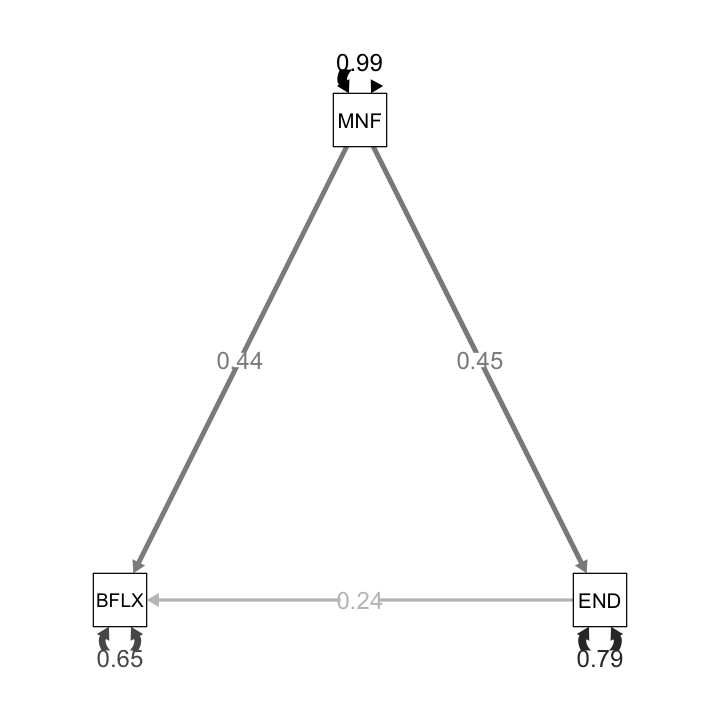

In [12]:
semPlot::semPaths(
    fit, "std",
    layout = "tree", sizeMan = 7, sizeInt = 4, style = "ram",
    residuals = TRUE, rotation = 1, intAtSide = FALSE,
    whatLabels = "est", nCharNodes = 0, curvature = 3,
    posCol = c("black"), edge.label.cex = 1.2
)

I coefficienti di percorso sono simili, ma non identici, a quelli trovati con Mplus. 

L'effetto diretto di MNF (Need Frustration) su  BFLX (Body Inflexibility) è uguale a 0.44.  Ma l'effetto totale è $0.44 + 0.45*0.24 = 0.55$. L'effetto di mediazione è uguale a $0.45*0.24 = 0.109$. L'outout di lavaan fornisce anche gli errori standard e il test che tali effetti siano uguali a zero.

Le correlazioni tra le variabili sono esprimibili nei termini dei coefficienti di percorso.  Per esempio la correlazionetra BFLX e MNF è

In [ ]:
.44 + .45*.24

La correlazione tra BFLX e END è

In [ ]:
.24 + .44*.45

L'output di lavaan fornisce anche la porzione di varianza che viene spiegata dalle variabili esogene per le due variabili endogene nel modello.

Per esempio, la varianza spiegata di `END` è

In [ ]:
0.45^2

come riportato dall'output di lavaan.  

:::

::: exercise
Continuiamo con l'esempio precedente, discusso da Barbeau, Boileau, Sarr &  Smith (2019) e esaminiamo ora un modello di path analisi più complesso (Fig. 4 di Barbeau et al., 2019). Usando la sintassi di lavaan, il modello diventa

In [ ]:
# BFLX – Body Inflexibility,
# END – Endorsement of Societal Beliefs about Thinness and Obesity,
# MNS – Mean Need Satisfaction, 
# MNF – Mean Need Frustration, 
# BULS – Bulimic Symptoms
mod <- "
  BULS ~ MNF + BFLX
  BFLX ~ END + MNF
  END ~ MNS + MNF
"

Adattiamo il modello ai dati.

In [ ]:
fit <- sem(
  mod,
  sample.cov = dat_cov,
  sample.nobs = 192
)

Esaminiamo la soluzione ottenuta.

In [ ]:
summary(fit, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE) |>
    print()

Generiamo il diagramma di percorso.

In [ ]:
semPlot::semPaths(
    fit, "std",
    layout = "tree", sizeMan = 7, sizeInt = 4, 
    residuals = TRUE, rotation = 1, intAtSide = FALSE,
    whatLabels = "est", nCharNodes = 0, curvature = 3,
    posCol = c("black"), edge.label.cex = 1.2
)

Anche in questo caso i coefficienti di percorso sono simili, ma non identici, a quelli riportati da Barbeau et al. (2019). Gli autori riportano una varianza spiegata di END pari a 0.209; con lavaan si ottiene 0.208.  Per BFLX gli autori riportano 0.292; lavaan ottiene 0.349. Per BULS gli autori riportano 0.478; con lavaan si ottiene 0.419. 

** Esercizio.** Weiss,  Forkus,  Contractor, e Schick (2018) esaminano con una path analisi la relazione tra la difficiltà di regolare le emozioni positive e l'abuso di alcol e di sostanze. 

- La difficoltà di regolare le emozioni positive viene misurata con la  *Difficulties in Emotion Regulation Scale – Positive* (DERS-P; Weiss, Gratz, & Lavender, 2015), che comprende le sottoscale di Acceptance, Impulse, e Goals.
- L'abuso di sostanze viene misurato con la *Drug Abuse Screening Test* (DAST; Skinner, 1982).
- L'abuso di alcol viene misurato con la *Alcohol Use Disorder Identification Test* (AUDIT; Saunders, Aasland, Babor, De la Fuente, & Grant, 1993), con le sottoscale di Hazardous Consumption, Dependence, e Consequences. 

I dati di un campione di 284 partecipanti sono riportati nella forma di una matrice di correlazione.

In [ ]:
lower <- '
   1
   .38 1
   .41 .64 1
   .34 .44 .30 1
   .29 .12 .27 .06 1
   .29 .22 .20 .17 .54 1
   .30 .15 .23 .09 .73 .69 1
'

In [ ]:
dat_cov <- lavaan::getCov(
  lower, 
  names=c("dmis","con", "dep", "consu", "acc", "goal", "imp"))
dat_cov

I dati vengono analizzati con due modelli di path analysis. Nel primo modello si ipotizza che la difficoltà di regolare le emozioni positive sia una variabile esogena che influenza sia l'abuso di sostanze sia l'abuso di alcol. Si ipotizza inoltre che abuso di sostanze e abuso di alcol siano correlate.

La difficoltà di regolare le emozioni positive è indicata da `drpe`; l'abuso di alcolo è denotato da `amis`; l'abuso di sostanze è denotato da `dmis`. 

In [ ]:
mod <- '
  drpe =~ NA*acc + goal + imp
  amis =~ NA*con + dep + consu
  amis ~ drpe
  dmis ~ drpe
  dmis ~~ amis
  drpe ~~ 1*drpe
  amis ~~ 1*amis
'

Svolgiamo l'analisi statistica con `sem()`.

In [ ]:
fit <- lavaan::sem(mod, sample.cov = dat_cov, sample.nobs = 284)

Esaminiamo i risultati.

In [ ]:
summary(fit, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE) |>
    print()

Creiamo un path diagram.

In [ ]:
semPlot::semPaths(
    fit, "std",
    layout = "tree", sizeMan = 7, sizeInt = 4, 
    residuals = TRUE, rotation = 1, intAtSide = FALSE,
    whatLabels = "est", nCharNodes = 0, curvature = 3,
    posCol = c("black"), edge.label.cex = 1.2
)

Gli autori esplorano un modello alternativo nel quale le relazioni causali vengono rovesciate: in questo caso è la difficoltà di regolazione delle emozioni positive ad essere la variabile esogena, e l'abuso di sostanze e l'abuso di alcol sono le variabili esogene.

In [ ]:
mod_alt <- '
  drpe =~ NA*acc + goal + imp
  amis =~ NA*con + dep + consu
  drpe ~ amis + dmis
  dmis ~~ amis
  drpe ~~ 1*drpe
  amis ~~ 1*amis
'

Adattiamo il modello ai dati.

In [5]:
fit_alt <- sem(mod_alt, sample.cov = dat_cov, sample.nobs = 311)

ERROR: Error in eval(mc, parent.frame()): object 'mod_alt' not found


Esaminiamo i risultati.

In [ ]:
summary(fit_alt, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE) |>
    print()

Creiamo il diagramma di percorso.

In [4]:
semPlot::semPaths(
    fit_alt, "std",
    layout = "tree", sizeMan = 7, sizeInt = 4, 
    residuals = TRUE, rotation = 1, intAtSide = FALSE,
    whatLabels = "est", nCharNodes = 0, curvature = 3,
    posCol = c("black"), edge.label.cex = 1.2
)


ERROR: Error in eval(expr, envir, enclos): object 'lg_math_ticZERO_lavaan_fit' not found


In [ ]:
lavaanPlot(model = fit_alt, labels = labels2, coefs = TRUE, covs = TRUE, stars = FALSE)


In entrambi i casi i risultati replicano quanto riportato dagli autori.
